In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import uniform, norm
from sklearn.linear_model import LinearRegression

from Tool_Functions import *
from Tool_Functions import data_gen_process


In [77]:
np.random.seed(42)

In [78]:
(beta1, beta2_values, M, n_train, n_test, seed, epsilon,
           x, x_train, x_test, epsilon_train, epsilon_test,
           liste_y, liste_y_train, liste_y_test)  = data_gen_process()

coefs_A, coefs_B, erreurs_A, erreurs_B = models_fit()
pa = erreurs_A[-1] # beta2 = 0.16
pb = erreurs_B[-1] # beta2 = 0.16
diff = pa - pb


In [79]:
def standard_error(): # erreur standard paramétrique

   mean_A = np.mean(pa)
   mean_B = np.mean(pb)
   mean_diff = np.mean(diff)

   se_A = np.std(pa)/(n_test**0.5)
   se_B = np.std(pb)/(n_test**0.5)
   se_diff = np.std(diff)/(n_test**0.5)

   return mean_A, mean_B, mean_diff, se_A, se_B, se_diff

def standard_error_boot(): # erreur standard déterminée par bootstrap de la moyenne

   B = 250
   bootstrap_indices = np.random.choice(n_test, size=(B, n_test), replace=True)
   bootstrap = []

   for indices in bootstrap_indices:
      boot_mean = np.mean(pa[indices])
      bootstrap.append(boot_mean)

   mean_A_boot = np.mean(bootstrap)
   se_boot_A = np.std(bootstrap)

   bootstrap = []

   for indices in bootstrap_indices:
      boot_mean = np.mean(pb[indices])
      bootstrap.append(boot_mean)

   mean_B_boot = np.mean(bootstrap)
   se_boot_B = np.std(bootstrap)

   bootstrap = []

   for indices in bootstrap_indices:
      boot_mean = np.mean(diff[indices])
      bootstrap.append(boot_mean)

   mean_diff_boot = np.mean(bootstrap)
   se_boot_diff = np.std(bootstrap)


   return mean_A_boot, mean_B_boot, mean_diff_boot, se_boot_A, se_boot_B, se_boot_diff

def confidence_interval_mean(): # intervalle de confiance par student

    mean_A, mean_B, mean_diff, se_A, se_B, se_diff = standard_error()

    t_critical = 1.96
    lower_A = mean_A - t_critical * se_A
    lower_B = mean_B - t_critical * se_B
    lower_diff = mean_diff - t_critical * se_diff
    upper_A = mean_A + t_critical * se_A
    upper_B = mean_B + t_critical * se_B
    upper_diff = mean_diff + t_critical * se_diff

    interval_A = pd.Interval(left=lower_A, right=upper_A, closed='both')
    interval_B = pd.Interval(left=lower_B, right=upper_B, closed='both')
    interval_diff = pd.Interval(left=lower_diff, right=upper_diff, closed='both')

    return interval_A, interval_B, interval_diff

def confidence_interval_perc_boot(): # intervalle de confiance par percentile bootstrap

   alpha = 0.05
   B = 250

   bootstrap_indices = np.random.choice(n_test, size=(B, n_test), replace=True)

   moy_boot_A = []
   moy_boot_B = []
   moy_boot_diff = []

   for indices in bootstrap_indices:
      boot_mean = np.mean(pa[indices])
      moy_boot_A.append(boot_mean)

   for indices in bootstrap_indices:
      boot_mean = np.mean(pb[indices])
      moy_boot_B.append(boot_mean)

   for indices in bootstrap_indices:
      boot_mean = np.mean(diff[indices])
      moy_boot_diff.append(boot_mean)

   lower_A = np.percentile(moy_boot_A, 100 * (alpha / 2))
   upper_A = np.percentile(moy_boot_A, 100 * (1 - alpha / 2))
   lower_B = np.percentile(moy_boot_B, 100 * (alpha / 2))
   upper_B = np.percentile(moy_boot_B, 100 * (1 - alpha / 2))
   lower_diff = np.percentile(moy_boot_diff, 100 * (alpha / 2))
   upper_diff = np.percentile(moy_boot_diff, 100 * (1 - alpha / 2))

   interval_A_boot = pd.Interval(left=lower_A, right=upper_A, closed='both')
   interval_B_boot = pd.Interval(left=lower_B, right=upper_B, closed='both')
   interval_diff_boot = pd.Interval(left=lower_diff, right=upper_diff, closed='both')

   return interval_A_boot, interval_B_boot, interval_diff_boot

def confidence_interval_basic_boot(): # intervalle de confiance par basic bootstrap
    
   alpha = 0.05
   B = 250

   bootstrap_indices = np.random.choice(n_test, size=(B, n_test), replace=True)

   moy_boot_A = []
   moy_boot_B = []
   moy_boot_diff = []

   for indices in bootstrap_indices:
      boot_mean = np.mean(pa[indices])
      moy_boot_A.append(boot_mean)

   for indices in bootstrap_indices:
      boot_mean = np.mean(pb[indices])
      moy_boot_B.append(boot_mean)

   for indices in bootstrap_indices:
      boot_mean = np.mean(diff[indices])
      moy_boot_diff.append(boot_mean)

   lower_A = np.percentile(moy_boot_A, 100 * (alpha / 2))
   upper_A = np.percentile(moy_boot_A, 100 * (1 - alpha / 2))
   lower_B = np.percentile(moy_boot_B, 100 * (alpha / 2))
   upper_B = np.percentile(moy_boot_B, 100 * (1 - alpha / 2))
   lower_diff = np.percentile(moy_boot_diff, 100 * (alpha / 2))
   upper_diff = np.percentile(moy_boot_diff, 100 * (1 - alpha / 2))

   interval_A_boot = pd.Interval(left=2*np.mean(pa)-upper_A, right=2*np.mean(pa)-lower_A, closed='both')

   interval_B_boot = pd.Interval(left=2*np.mean(pb)-upper_B, right=2*np.mean(pb)-lower_B, closed='both')

   interval_diff_boot = pd.Interval(left=2*np.mean(diff)-upper_diff, right=2*np.mean(diff)-lower_diff, closed='both')

   return interval_A_boot, interval_B_boot, interval_diff_boot


In [80]:
def bca_boot(alpha=0.05): # bootstrap acceléré
    
    B = 250
    bootstrap_indices = np.random.choice(n_test, size=(B, n_test), replace=True)
    sample_means = []

    for indices in bootstrap_indices:
      
      boot_mean = np.mean(pa[indices])
      sample_means.append(boot_mean)
    
    original_mean = np.mean(pa)

    # Acceleration
    jackknife_samples = np.array([np.mean(np.delete(pa, i)) for i in range(len(pa))])
    jackknife_mean = np.mean(jackknife_samples)
    a = np.sum((jackknife_mean - jackknife_samples) ** 3) / (6 * np.sum((jackknife_mean - jackknife_samples) ** 2) ** 1.5)

    # Bias correction
    z0 = stats.norm.ppf(np.mean(sample_means < original_mean))

    z_alpha = norm.ppf(alpha / 2)
    z_1_alpha = norm.ppf(1 - alpha / 2)
    
    lower_percentile = norm.cdf(z0 + (z0 + z_alpha) / (1 - a * (z0 + z_alpha))) * 100
    upper_percentile = norm.cdf(z0 + (z0 + z_1_alpha) / (1 - a * (z0 + z_1_alpha))) * 100

    bca_interval_A = np.percentile(sample_means, [lower_percentile, upper_percentile])

    sample_means = []
    for indices in bootstrap_indices:  
      boot_mean = np.mean(pb[indices])
      sample_means.append(boot_mean)
    
    original_mean = np.mean(pb)
    jackknife_samples = np.array([np.mean(np.delete(pb, i)) for i in range(len(pa))])
    jackknife_mean = np.mean(jackknife_samples)
    a = np.sum((jackknife_mean - jackknife_samples) ** 3) / (6 * np.sum((jackknife_mean - jackknife_samples) ** 2) ** 1.5)
    z0 = stats.norm.ppf(np.mean(sample_means < original_mean))
    z_alpha = norm.ppf(alpha / 2)
    z_1_alpha = norm.ppf(1 - alpha / 2) 
    lower_percentile = norm.cdf(z0 + (z0 + z_alpha) / (1 - a * (z0 + z_alpha))) * 100
    upper_percentile = norm.cdf(z0 + (z0 + z_1_alpha) / (1 - a * (z0 + z_1_alpha))) * 100

    bca_interval_B = np.percentile(sample_means, [lower_percentile, upper_percentile])

    sample_means = []
    for indices in bootstrap_indices:
      boot_mean = np.mean(diff[indices])
      sample_means.append(boot_mean)
    
    original_mean = np.mean(diff)
    jackknife_samples = np.array([np.mean(np.delete(diff, i)) for i in range(len(diff))])
    jackknife_mean = np.mean(jackknife_samples)
    a = np.sum((jackknife_mean - jackknife_samples) ** 3) / (6 * np.sum((jackknife_mean - jackknife_samples) ** 2) ** 1.5)
    z0 = stats.norm.ppf(np.mean(sample_means < original_mean))
    z_alpha = norm.ppf(alpha / 2)
    z_1_alpha = norm.ppf(1 - alpha / 2)   
    lower_percentile = norm.cdf(z0 + (z0 + z_alpha) / (1 - a * (z0 + z_alpha))) * 100
    upper_percentile = norm.cdf(z0 + (z0 + z_1_alpha) / (1 - a * (z0 + z_1_alpha))) * 100

    bca_interval_diff = np.percentile(sample_means, [lower_percentile, upper_percentile])

    return bca_interval_A, bca_interval_B, bca_interval_diff


In [81]:
def plot_intervals():

    interval_A_boot, interval_B_boot, interval_diff_boot = confidence_interval_basic_boot()
    interval_A_boot_perc, interval_B_boot_perc, interval_diff_boot_perc = confidence_interval_perc_boot()
    interval_A, interval_B, interval_diff = confidence_interval_mean()
    bca_interval_A, bca_interval_B, bca_interval_diff = bca_boot()

    def extract_bounds(intervals):
        if isinstance(intervals, pd.Interval):
            return [intervals.left], [intervals.right]
        elif all(isinstance(interval, pd.Interval) for interval in intervals):
            lower_bounds = [interval.left for interval in intervals]
            upper_bounds = [interval.right for interval in intervals]
            return lower_bounds, upper_bounds
        else:
            raise TypeError("All elements must be pandas Interval objects or a single Interval object")

    y1, y2 = extract_bounds(interval_A)
    y3, y4 = extract_bounds(interval_A_boot)
    y5, y6 = extract_bounds(interval_A_boot_perc)
    y7, y8 = bca_interval_A[0], bca_interval_A[1]

    print("Intervalle de confiance A:", [y1,y2])
    print("Intervalle de confiance A, basic bootstrap:", [y3,y4])
    print("Intervalle de confiance A, percentile bootstrap:", [y5,y6])
    print("Intervalle de confiance A, accelerated bootstrap:", [y7,y8])

    x = np.linspace(0,1,1)

    plt.figure(figsize=(10, 6))
    plt.axhline(y1, label='lower bound mean', marker='o', color="lightblue")
    plt.axhline(y2, label='upper bound mean', marker='o', color="darkblue")
    plt.axhline(y3, label='lower bound basic boot', marker='o', color="brown")
    plt.axhline(y4, label='upper bound basic boot', marker='o', color="darkred")
    plt.axhline(y5, label='lower bound perc boot', marker='o', color="lightgreen")
    plt.axhline(y6, label='upper bound perc boot', marker='o', color="darkgreen")
    plt.axhline(y7, label='lower bound bca boot', marker='o', color="yellow")
    plt.axhline(y8, label='upper bound bca boot', marker='o', color="orange")

    plt.fill_between(x, y1, y2, color='blue', alpha=0.3, label='Interval for mean')
    plt.fill_between(x, y3, y4, color='red', alpha=0.3, label='Interval for basic boot')
    plt.fill_between(x, y5, y6, color='yellow', alpha=0.3, label='Interval for perc boot')
    plt.xlabel('')
    plt.ylabel('Interval confidence of the mean A')
    plt.title('Boostrapped confidence intervals of mean A, beta2 = 0.16')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    y1, y2 = extract_bounds(interval_B)
    y3, y4 = extract_bounds(interval_B_boot)
    y5, y6 = extract_bounds(interval_B_boot_perc)
    y7, y8 = bca_interval_B[0], bca_interval_B[1]

    print("Intervalle de confiance B:", [y1,y2])
    print("Intervalle de confiance B, basic bootstrap:", [y3,y4])
    print("Intervalle de confiance B, percentile bootstrap:", [y5,y6])
    print("Intervalle de confiance B, accelerated bootstrap:", [y7,y8])


    x = np.linspace(0,1,1)

    plt.figure(figsize=(10, 6))
    plt.axhline(y1, label='lower bound mean', marker='o', color="lightblue")
    plt.axhline(y2, label='upper bound mean', marker='o', color="darkblue")
    plt.axhline(y3, label='lower bound basic boot', marker='o', color="brown")
    plt.axhline(y4, label='upper bound basic boot', marker='o', color="darkred")
    plt.axhline(y5, label='lower bound perc boot', marker='o', color="lightgreen")
    plt.axhline(y6, label='upper bound perc boot', marker='o', color="darkgreen")
    plt.axhline(y7, label='lower bound bca boot', marker='o', color="yellow")
    plt.axhline(y8, label='upper bound bca boot', marker='o', color="orange")

    plt.fill_between(x, y1, y2, color='blue', alpha=0.3, label='Interval for mean')
    plt.fill_between(x, y3, y4, color='red', alpha=0.3, label='Interval for basic boot')
    plt.fill_between(x, y5, y6, color='yellow', alpha=0.3, label='Interval for perc boot')
    plt.xlabel('')
    plt.ylabel('Interval confidence of the mean B')
    plt.title('Boostrapped confidence intervals of mean B, beta2 = 0.16')
    plt.legend()
    plt.grid(True)
    plt.show()

    y1, y2 = extract_bounds(interval_diff)
    y3, y4 = extract_bounds(interval_diff_boot)
    y5, y6 = extract_bounds(interval_diff_boot_perc)
    y7, y8 = bca_interval_diff[0], bca_interval_diff[1]

    print("Intervalle de confiance A-B:", [y1,y2])
    print("Intervalle de confiance A-B, basic bootstrap:", [y3,y4])
    print("Intervalle de confiance A-B, percentile bootstrap:", [y5,y6])
    print("Intervalle de confiance A-B, accelerated bootstrap:", [y7,y8])

    x = np.linspace(0,1,1)

    plt.figure(figsize=(10, 6))
    plt.axhline(y1, label='lower bound mean', marker='o', color="lightblue")
    plt.axhline(y2, label='upper bound mean', marker='o', color="darkblue")
    plt.axhline(y3, label='lower bound basic boot', marker='o', color="brown")
    plt.axhline(y4, label='upper bound basic boot', marker='o', color="darkred")
    plt.axhline(y5, label='lower bound perc boot', marker='o', color="lightgreen")
    plt.axhline(y6, label='upper bound perc boot', marker='o', color="darkgreen")
    plt.axhline(y7, label='lower bound bca boot', marker='o', color="yellow")
    plt.axhline(y8, label='upper bound bca boot', marker='o', color="orange")

    plt.fill_between(x, y1, y2, color='blue', alpha=0.3, label='Interval for mean')
    plt.fill_between(x, y3, y4, color='red', alpha=0.3, label='Interval for basic boot')
    plt.fill_between(x, y5, y6, color='yellow', alpha=0.3, label='Interval for perc boot')
    plt.xlabel('')
    plt.ylabel('Interval confidence of the mean A-B')
    plt.title('Boostrapped confidence intervals of mean A-B, beta2 = 0.16')
    plt.legend()
    plt.grid(True)
    plt.show()

Intervalle de confiance A: [[1.025437090990029], [1.1599799969385223]]
Intervalle de confiance A, basic bootstrap: [[1.0367068952602139], [1.1663183115931237]]
Intervalle de confiance A, percentile bootstrap: [[1.0279779004186074], [1.160770149067566]]
Intervalle de confiance A, accelerated bootstrap: [1.0329049160995234, 1.1634093010665574]


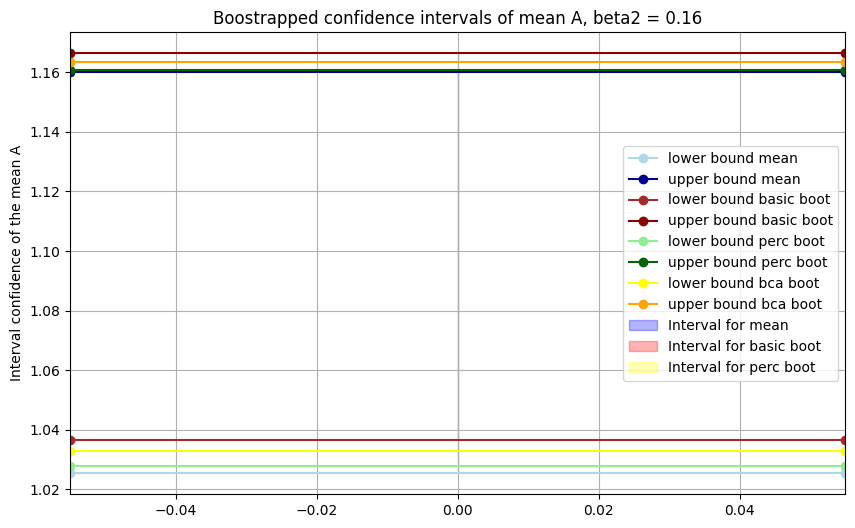

Intervalle de confiance B: [[0.9513572138085039], [1.0828701468411321]]
Intervalle de confiance B, basic bootstrap: [[0.9515046078051825], [1.088733053134317]]
Intervalle de confiance B, percentile bootstrap: [[0.9589857002700592], [1.0870750886361977]]
Intervalle de confiance B, accelerated bootstrap: [0.9549384229315512, 1.0746469519449202]


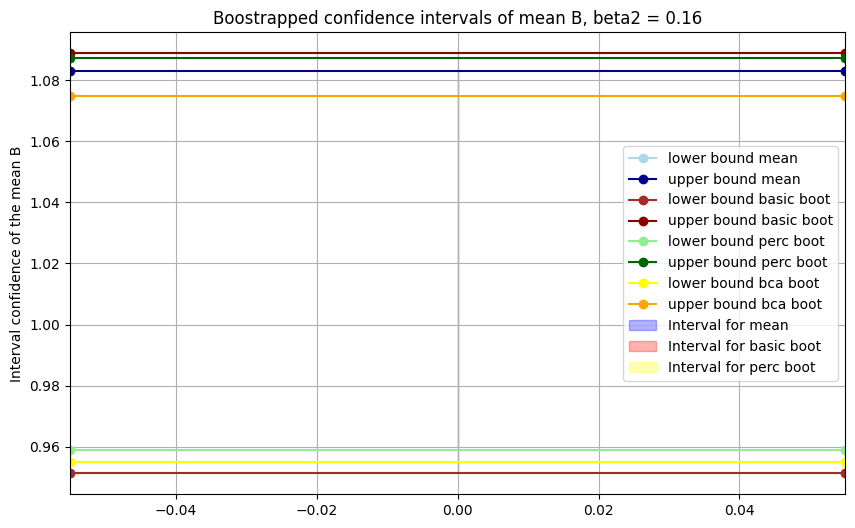

Intervalle de confiance A-B: [[0.036800008474498255], [0.11438971880441716]]
Intervalle de confiance A-B, basic bootstrap: [[0.03753021747598792], [0.11124573624013681]]
Intervalle de confiance A-B, percentile bootstrap: [[0.03884567861722734], [0.11192451039778326]]
Intervalle de confiance A-B, accelerated bootstrap: [0.039145956746609756, 0.11155853332001793]


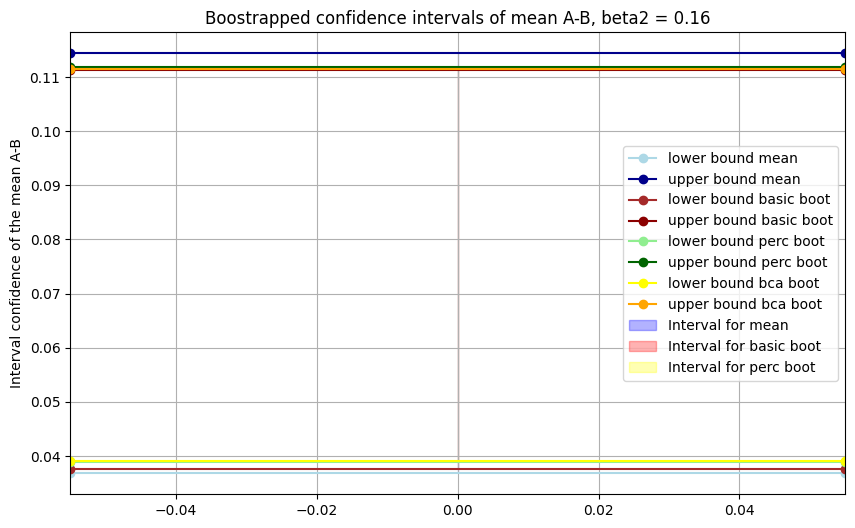

In [82]:
plot_intervals()

In [83]:
def statistical_testing(): # Paired test, testing the null hypothesis mu_D = 0

        mean_A, mean_B, mean_diff, se_A, se_B, se_diff = standard_error()
        mean_A_boot, mean_B_boot, mean_diff_boot, se_A_boot, se_B_boot, se_diff_boot = standard_error_boot()

        test_stat = mean_diff/se_diff

        student_bil = stats.t.ppf(0.975, df=n_test-1)
        p_value_bil = 1 - stats.t.cdf(abs(test_stat), df = n_test-1)
        student_right = stats.t.ppf(0.95, df=n_test-1)
        p_value_right = 1 - stats.t.cdf(test_stat, df=n_test-1)

        puissance_bil = 1 - stats.norm.cdf(student_bil - test_stat, 0, 1)
        puissance_right = 1 - stats.norm.cdf(student_right - test_stat, 0, 1)


        test_stat_boot = mean_diff_boot/se_diff_boot

        p_value_bil_boot = 1 - stats.t.cdf(abs(test_stat_boot), df = n_test-1)
        p_value_right_boot = 1 - stats.t.cdf(test_stat_boot, df=n_test-1)
        puissance_bil_boot = 1 - stats.norm.cdf(student_bil - test_stat_boot, 0, 1)
        puissance_right_boot = 1 - stats.norm.cdf(student_right - test_stat_boot, 0, 1)

        return p_value_bil, p_value_bil_boot, puissance_bil, puissance_bil_boot

def statistical_testing_varying_beta2():

   differences = [a - b for a, b in zip(erreurs_A, erreurs_B)]
   standard_errors = []
   test_statistics = []
   p_values_r = []
   p_values_bil = []
   puissances_bil = []
   puissances_r = []

   for diff in differences:

      mean_diff = np.mean(diff)
      se_diff = np.std(diff)/(n_test**0.5)
      test_stat = mean_diff/se_diff
      student_bil = stats.t.ppf(0.975, df=n_test-1)
      student_right = stats.t.ppf(0.95, df=n_test-1)
      p_value_bil = 1 - stats.t.cdf(abs(test_stat), df = n_test-1)
      p_value_right = 1 - stats.t.cdf(test_stat, df=n_test-1)
      puissance_bil = 1 - stats.norm.cdf(student_bil - test_stat, 0, 1)
      puissance_right = 1 - stats.norm.cdf(student_right - test_stat, 0, 1)
   
      standard_errors.append(se_diff)
      test_statistics.append(test_stat)
      p_values_r.append(p_value_right)
      p_values_bil.append(p_value_bil)
      puissances_bil.append(puissance_bil)
      puissances_r.append(puissance_right)

   return  standard_errors, test_statistics , p_values_r , p_values_bil , puissances_bil , puissances_r  


def statistical_testing_varying_beta2_bootstrap():

   differences = [a - b for a, b in zip(erreurs_A, erreurs_B)]
   standard_errors = []
   test_statistics = []
   p_values_r = []
   p_values_bil = []
   puissances_bil = []
   puissances_r = []

   for diff in differences:

    B = 250
    bootstrap_indices = np.random.choice(n_test, size=(B, n_test), replace=True)
    sample_means = []

    for indices in bootstrap_indices:
      
      boot_mean = np.mean(diff[indices])
      sample_means.append(boot_mean)

    mean_diff = np.mean(sample_means)
    se_diff = np.std(sample_means)
    test_stat = mean_diff/se_diff
    student_bil = stats.t.ppf(0.975, df=n_test-1)
    student_right = stats.t.ppf(0.95, df=n_test-1)
    p_value_bil = 1 - stats.t.cdf(abs(test_stat), df = n_test-1)
    p_value_right = 1 - stats.t.cdf(test_stat, df=n_test-1)
    puissance_bil = 1 - stats.norm.cdf(student_bil - test_stat, 0, 1)
    puissance_right = 1 - stats.norm.cdf(student_right - test_stat, 0, 1)
   
    standard_errors.append(se_diff)
    test_statistics.append(test_stat)
    p_values_r.append(p_value_right)
    p_values_bil.append(p_value_bil)
    puissances_bil.append(puissance_bil)
    puissances_r.append(puissance_right)

   return  standard_errors, test_statistics , p_values_r , p_values_bil , puissances_bil , puissances_r
    

def plot_tests():

   standard_errors, test_statistics , p_values_r , p_values_bil , puissances_bil , puissances_r  = statistical_testing_varying_beta2()

   plt.figure()
   plt.title("Statistiques de test en fonction de beta2")
   plt.plot(beta2_values, standard_errors, label = "Statistiques de test")
   plt.grid()
   plt.legend()
   plt.show()
   plt.figure()
   plt.title("Statistiques de test en fonction de beta2")
   plt.plot(beta2_values, test_statistics, label = "Statistiques de test")
   plt.grid()
   plt.legend()
   plt.show()

   plt.figure()
   plt.title("P values du test en fonction de beta2")
   plt.plot(beta2_values, p_values_bil, label = "p-values du test bilatéral")
   plt.plot(beta2_values, p_values_r, label = "p-values du test unilatéral")
   plt.grid()
   plt.legend()
   plt.show()

   plt.figure()
   plt.title("Puissance du test en fonction de beta2")
   plt.plot(beta2_values, puissances_bil, label = "Puissance du test bilateral")
   plt.plot(beta2_values, puissances_r, label = "Puissance du test unilateral")
   plt.grid()
   plt.legend()
   plt.show()
   
def plot_test_comparison():
    
   standard_errors, test_statistics , p_values_r , p_values_bil , puissances_bil , puissances_r  = statistical_testing_varying_beta2()
   standard_errors_boot, test_statistics_boot , p_values_r_boot , p_values_bil_boot , puissances_bil_boot , puissances_r_boot = statistical_testing_varying_beta2_bootstrap()

   plt.figure()
   plt.title("Erreurs standards en fonction de beta2")
   plt.plot(beta2_values, standard_errors, label = "Erreurs standard paramétrique", color = "green" )
   plt.plot(beta2_values, standard_errors_boot, label = "Erreurs standard bootstrap", color = "orange")
   plt.grid()
   plt.legend()
   plt.show()
   
   plt.figure()
   plt.title("Statistiques de test en fonction de beta2")
   plt.plot(beta2_values, test_statistics, label = "Statistiques de test paramétrique", color = "green" )
   plt.plot(beta2_values, test_statistics_boot, label = "Statistiques de test bootstrap", color = "orange")
   plt.grid()
   plt.legend()
   plt.show()

   plt.figure()
   plt.title("P values du test en fonction de beta2")
   plt.plot(beta2_values, p_values_bil, label = "p-values du test bilatéral", color = "green")
   plt.plot(beta2_values, p_values_bil_boot, label = "p-values du test bilatéral boot", color = "orange" )
   plt.grid()
   plt.legend()
   plt.show()

   plt.figure()
   plt.title("P values du test en fonction de beta2")
   plt.plot(beta2_values, p_values_r, label = "p-values du test unilatéral", color = "green")
   plt.plot(beta2_values, p_values_r_boot, label = "p-values du test unilatéral boot", color = "orange" )
   plt.grid()
   plt.legend()
   plt.show()

   plt.figure()
   plt.title("Puissance du test en fonction de beta2")
   plt.plot(beta2_values, puissances_bil, label = "Puissance du test bilateral", color = "green" )
   plt.plot(beta2_values, puissances_bil_boot, label = "Puissance du test bilateral boot", color = "orange" )
   plt.grid()
   plt.legend()
   plt.show()

   plt.figure()
   plt.title("Puissance du test selon beta2")
   plt.plot(beta2_values, puissances_r_boot, label = "puissance unilatérale bootstrap", color = "orange")
   plt.plot(beta2_values, puissances_r, label = "puissance unilatérale paramétrique", color = "green")
   plt.plot(beta2_values, puissances_bil_boot, label = "puissance bilatérale bootstrap", color = "yellow")
   plt.plot(beta2_values, puissances_bil, label = "puissance bilatérale paramétrique", color = "lightgreen")
   plt.grid()
   plt.legend()
   plt.show()

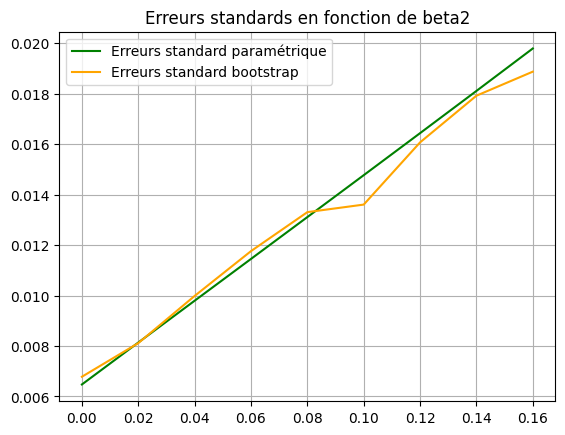

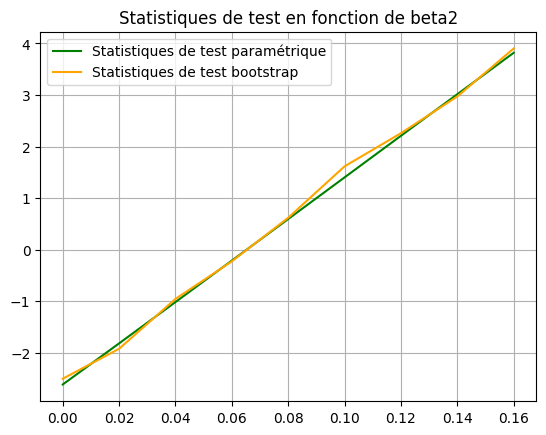

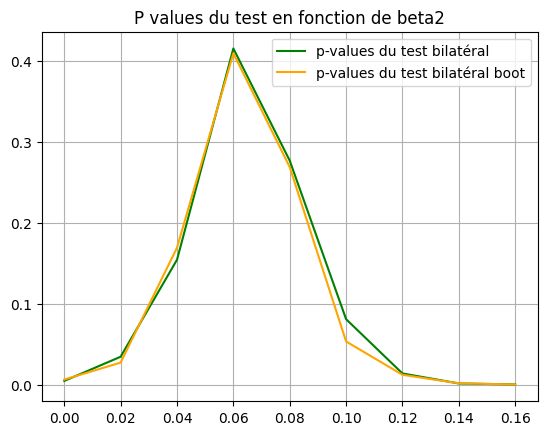

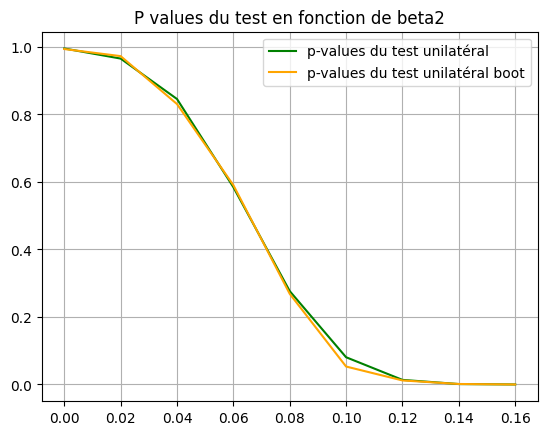

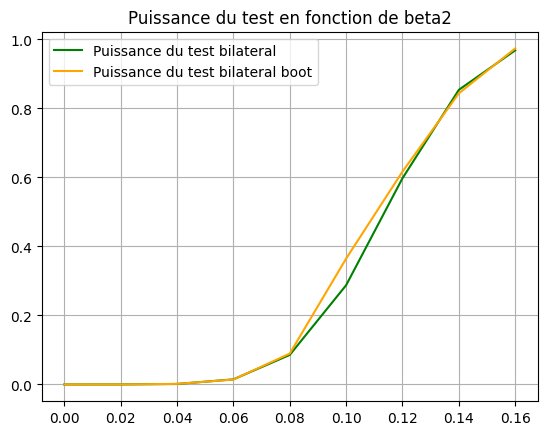

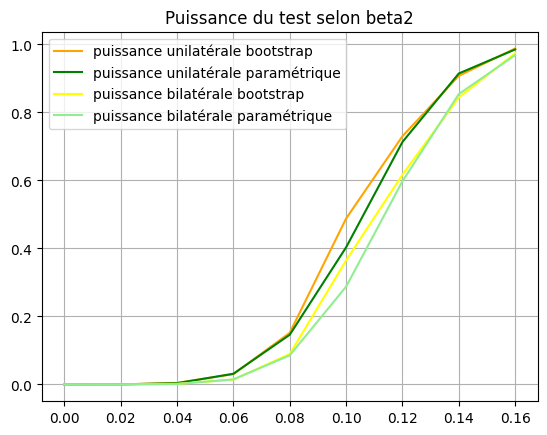

In [84]:
plot_test_comparison()